## Veriyi Anlamak

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore")

In [4]:
# Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("Eğitim Seti Boyutu: ",x_train.shape,y_train.shape)

Eğitim Seti Boyutu:  (60000, 28, 28) (60000,)


In [6]:
print("Test Seti Boyutu: ",x_test.shape,y_test.shape)

Test Seti Boyutu:  (10000, 28, 28) (10000,)


In [7]:
numLable = len(np.unique(y_train))

In [8]:
numLable

10

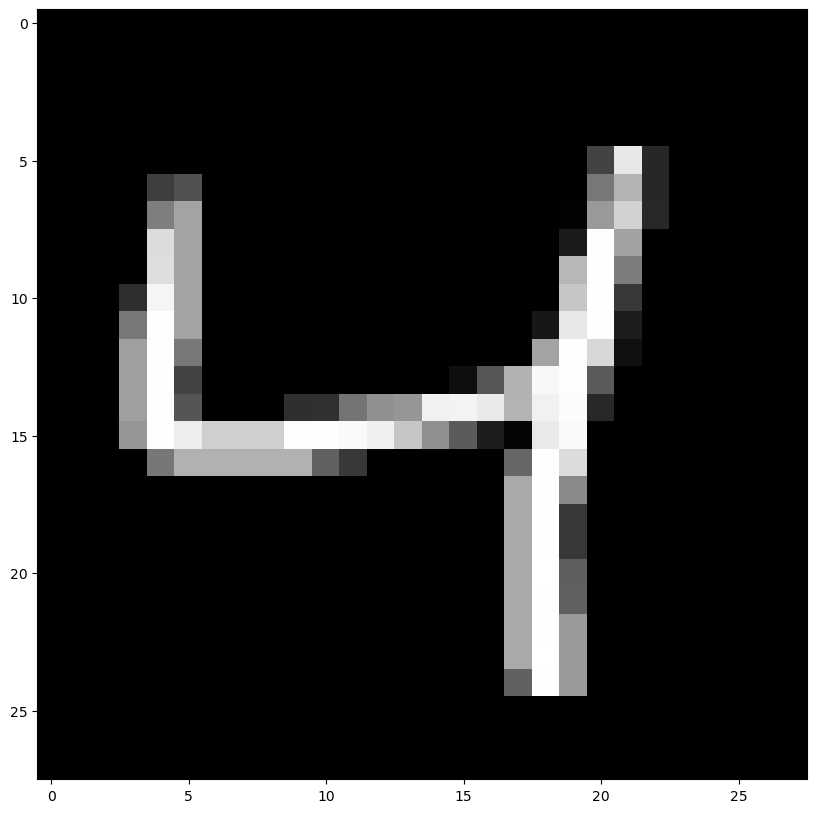

In [9]:
# Veri Setinden Örnekler Gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[2],cmap="gray")

In [10]:
# RGB (0-255)
# r:250, g:0, b:250 mor

In [11]:
x_train[2].shape

(28, 28)

In [12]:
x_train[2][10,10]

0

In [13]:
x_train[2][14,10]

49

In [14]:
x_train[2].sum()

19443

In [15]:
x_train[2][14:20, 14:28]

array([[241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,   0,
          0],
       [143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,   0,
          0]], dtype=uint8)

In [16]:
x_train[2][14:20, 14:28].mean()

50.904761904761905

## Veriyi Hazırlamak

## Encoding

Önce [0 1 2 3 4 5 6 7 8 9]
Sonra[0 1 0 0 0 0 0 0 0 0]

In [18]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Reshaping

In [21]:
image_size = x_train.shape[1]

In [22]:
image_size

28

In [23]:
print(x_train.shape)

(60000, 28, 28)


In [24]:
print(x_test.shape)

(10000, 28, 28)


In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [26]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

Standardizition

In [30]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Modelleme

Sinir Ağı Mimarisini Tanımlamak

In [42]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=numLable,activation="softmax",name="output_layer")
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [43]:
model

In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
fitModel = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0069 - precision_2: 0.9987 - recall_1: 0.9984 - accuracy: 0.9986 - val_loss: 0.0946 - val_precision_2: 0.9766 - val_recall_1: 0.9745 - val_accuracy: 0.9756
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 - precision_2: 0.9993 - recall_1: 0.9991 - accuracy: 0.9992 - val_loss: 0.0851 - val_precision_2: 0.9796 - val_recall_1: 0.9779 - val_accuracy: 0.9783
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0037 - precision_2: 0.9997 - recall_1: 0.9996 - accuracy: 0.9997 - val_loss: 0.0891 - val_precision_2: 0.9784 - val_recall_1: 0.9775 - val_accuracy: 0.9777
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0041 - precision_2: 0.9993 - recall_1: 0.9992 - accuracy: 0.9992 - val_loss: 0.0926 - val_precision_2: 0.9786 - val_recall_1: 0.9775 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

In [47]:
fitModel

## Modelin Kaydedilmesi ve Tahmin İçin Kullanılmsı

In [62]:
model.save('fitModel.h5')
import random
random = random.randint(0,x_test.shape[0])

In [63]:
random

3785

In [64]:
test_image = x_test[random]

In [65]:
y_test[random]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

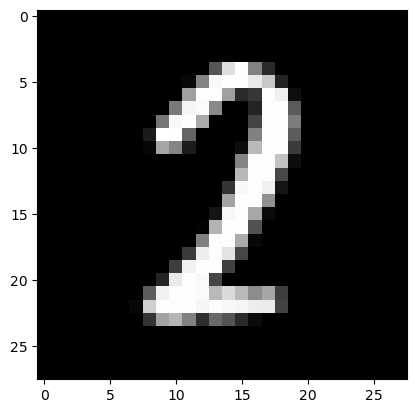

In [68]:
plt.imshow(test_image.reshape(28,28),cmap='gray');

In [69]:
test_data = x_test[random].reshape(1,28,28,1)

In [70]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 108ms/step


In [71]:
probability

array([[4.1653287e-08, 5.2321220e-06, 9.9937028e-01, 3.1636368e-06,
        1.0891137e-16, 4.9986393e-13, 5.7597796e-16, 5.3719600e-04,
        8.3985993e-05, 1.0386776e-07]], dtype=float32)